アブスト  
LSGANが100次元のノイズからどう画像を生成しているのか知りたくて、生成器の転置畳み込み層のカーネルと層を通した後の特徴マップを可視化した。  
その結果、画像生成する過程は確認できた。  
しかし、個々のカーネルが他のカーネルとどう協調して画像を作っていっているのかは、全く理解できなかった。


In [63]:
### データの準備

In [64]:
import random

import torch
import torchvision
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
import sys

sys.path += [
    '..'
]




In [66]:
from net import Generator

In [67]:
fixed_noise = torch.randn(50, 100, 1, 1, device='cuda')

### カーネルの可視化

In [68]:
model = Generator().to('cuda')
weight_path = '../weights/netG_epoch_36.pth'
model.load_state_dict(torch.load(weight_path))

<All keys matched successfully>

In [69]:
# 使用するGeneratorの構成。下記のように5層の転置畳み込み層を経てアップサンプリングしている。
# 各層の入出力テンソルの [N, C, H, W]
# L0 [N, 100, 1, 1] → [N, 512, 4, 4]
# L1 [N, 512, 4, 4] → [N, 256, 8, 8]
# L2 [N, 256, 8, 8] → [N, 128, 16, 16]
# L3 [N, 128, 16, 16] → [N, 64, 32, 32]
# L4 [N, 64, 32, 32] → [N, 3, 64, 64]
model

Generator(
  (layers): ModuleList(
    (0): Sequential(
      (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1))
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (4): Sequential(
      (0): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(

### 0層目のカーネルを可視化してみる。

In [70]:
# 0層目のカーネルを抽出してみる。(ついでにnumpy形式にしておく)
conv2d_trans = model.layers[0][0].weight.cpu().data.numpy()

In [71]:
# [N, 100, 1, 1]テンソル用の 4*4 のカーネルが512枚
conv2d_trans.shape

(100, 512, 4, 4)

In [72]:
# 0番目のチャネル担当の0番目のカーネルはこんな感じ
conv2d_trans[0, 0, ...]

array([[-0.02957575, -0.04331691,  0.00290405,  0.00577161],
       [-0.00903617, -0.00712542,  0.03212347, -0.06939698],
       [ 0.0560257 , -0.00632013, -0.04354385,  0.05761593],
       [ 0.01846934,  0.03246962,  0.02282178, -0.07901611]],
      dtype=float32)

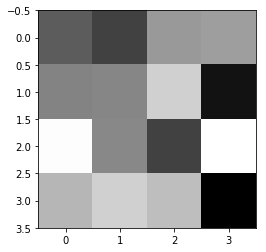

In [73]:
# プロットするとこんな感じ。
plt.imshow(conv2d_trans[0, 0, ...], cmap='gray')

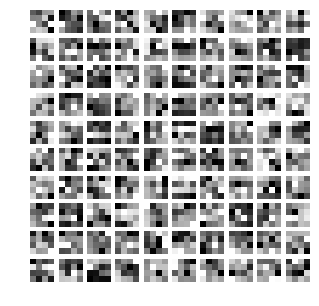

In [74]:
# L0のカーネルをもうちょっと複数見てみる
row = 10
col = 10
plt.figure(figsize=(5,5))

num = 0

for i in range(row):
    for j in range(col):
        num += 1
        plt.subplot(row, col, num)
        plt.imshow(conv2d_trans[i, j, ...], cmap='gray')
        plt.axis('off')

### 1層目のカーネルを可視化してみる。

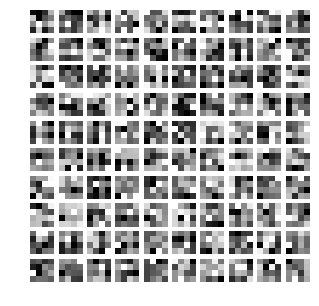

In [75]:
# L1のカーネルをもうちょっと複数見てみる
conv2d_trans_l1 = model.layers[1][0].weight.data.cpu().numpy()
row = 10
col = 10
plt.figure(figsize=(5,5))

num = 0

for i in range(row):
    for j in range(col):
        num += 1
        plt.subplot(row, col, num)
        plt.imshow(conv2d_trans_l1[i, j, ...], cmap='gray')
        plt.axis('off')

### 2層目のカーネルを可視化してみる。

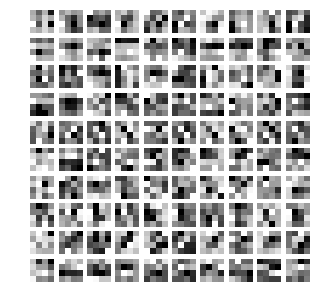

In [76]:
# L2のカーネルをもうちょっと複数見てみる
conv2d_trans_l2 = model.layers[2][0].weight.data.cpu().numpy()
row = 10
col = 10
plt.figure(figsize=(5,5))

num = 0

for i in range(row):
    for j in range(col):
        num += 1
        plt.subplot(row, col, num)
        plt.imshow(conv2d_trans_l2[i, j, ...], cmap='gray')
        plt.axis('off')

### 3層目のカーネルを可視化してみる。

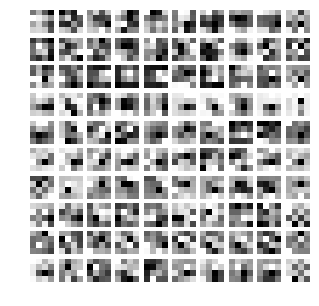

In [77]:
# L3のカーネルをもうちょっと複数見てみる
conv2d_trans_l3 = model.layers[3][0].weight.data.cpu().numpy()
row = 10
col = 10
plt.figure(figsize=(5,5))

num = 0

for i in range(row):
    for j in range(col):
        num += 1
        plt.subplot(row, col, num)
        plt.imshow(conv2d_trans_l3[i, j, ...], cmap='gray')
        plt.axis('off')

### 4層目のカーネルを可視化してみる。

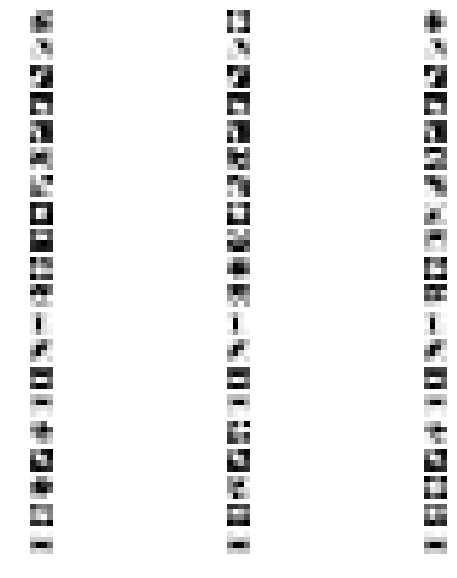

In [78]:
# L4のカーネルをもうちょっと複数見てみる
conv2d_trans_l4 = model.layers[4][0].weight.data.cpu().numpy()
row = 20
col = 3
plt.figure(figsize=(10,10))

num = 0

for i in range(row):
    for j in range(col):
        num += 1
        plt.subplot(row, col, num)
        plt.imshow(conv2d_trans_l4[i, j, ...], cmap='gray')
        plt.axis('off')

L0とL4で比べると、L4の方が線状な気がする。

---
### カーネルを通した後の特徴マップの可視化

In [79]:
# 画像の標準化
def min_max(x, axis=None):
    min = x.min(axis=axis, keepdims=True)
    max = x.max(axis=axis, keepdims=True)
    result = (x-min)/(max-min)
    return result


In [80]:
# generatorに通してノイズから画像の生成
result = model(fixed_noise)
im = result.data.cpu().numpy()
im = im.transpose((0,2,3,1))
im.shape
im = min_max(im)  # 標準化


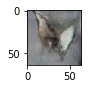

In [81]:
# 生成した3番目の画像をプロット。STL10データセットで学習しているので、おそらく'bird'クラスっぽいものができている。
plt.figure(figsize=(1,1))
plt.imshow(im[2])

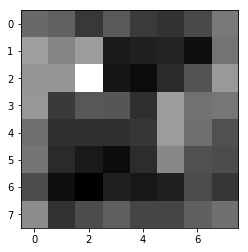

In [82]:
# 1層目までの処理結果に対して、チャンネル方向に平均を取って可視化
x  = fixed_noise

for i in range(2):
    x = model.layers[i](x)
im_one = x.data.cpu().numpy()

im_one.shape

im_a = im_one.mean(axis=1)
im_g = im_a[2]

plt.imshow(im_g, cmap='gray')

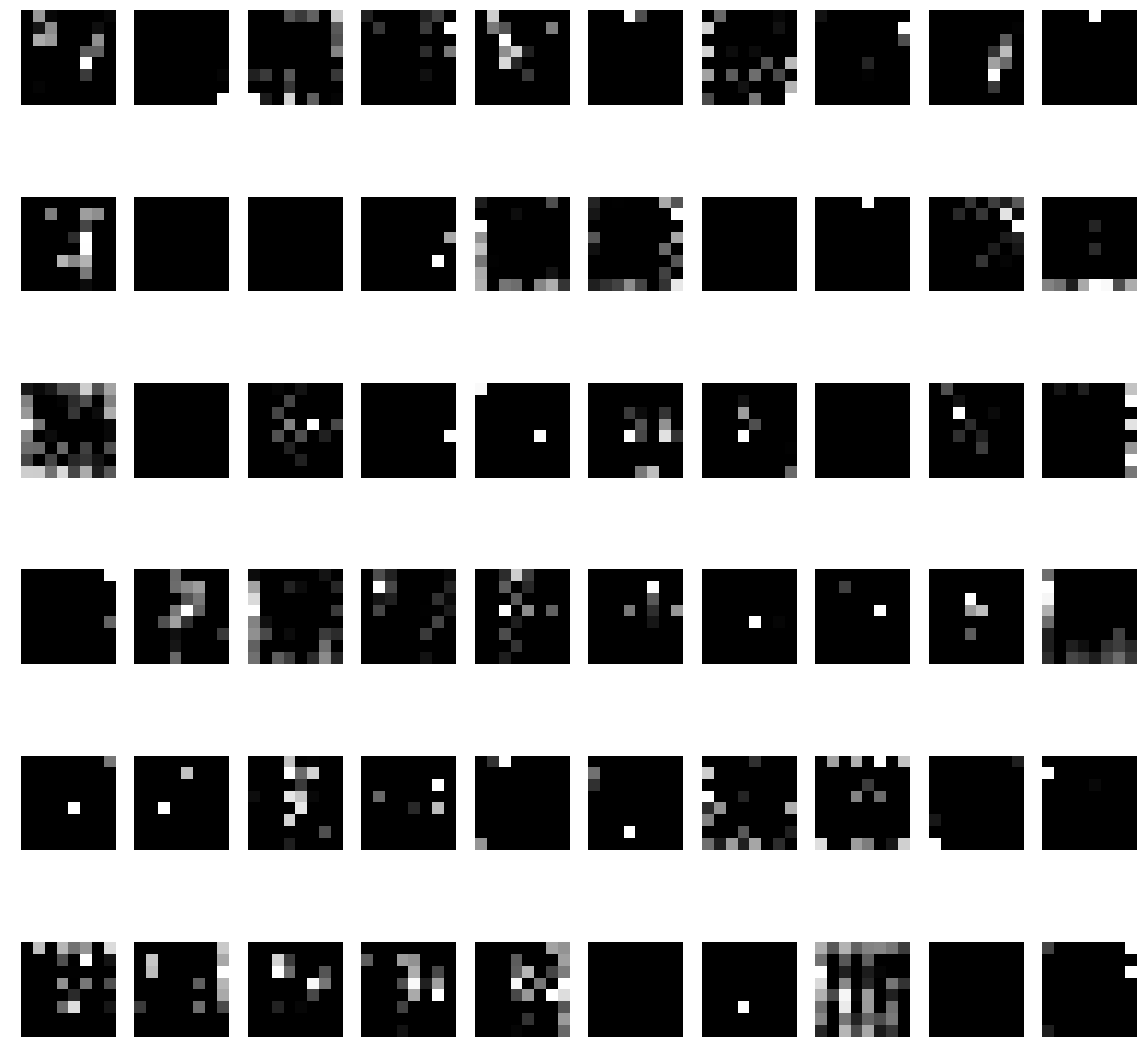

In [83]:
# 1層目までの特徴マップを、もうちょっと各チャンネルを可視化してみる
row = 6
col = 10
plt.figure(figsize=(20,20))

num = 0

for i in range(row):
    for j in range(col):
        num += 1
        plt.subplot(row, col, num)
        plt.imshow(im_one[2, i*10+j], cmap='gray')
        plt.axis('off')

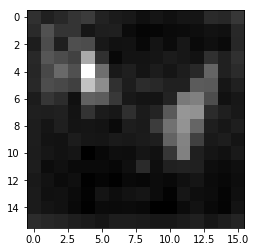

In [84]:
# 2層目までの特徴マップに対して、チャンネル方向に平均を取って可視化
x  = fixed_noise

for i in range(3):
    x = model.layers[i](x)
im_one = x.data.cpu().numpy()

im_one.shape

im_a = im_one.mean(axis=1)
im_g = im_a[2]

plt.imshow(im_g, cmap='gray')

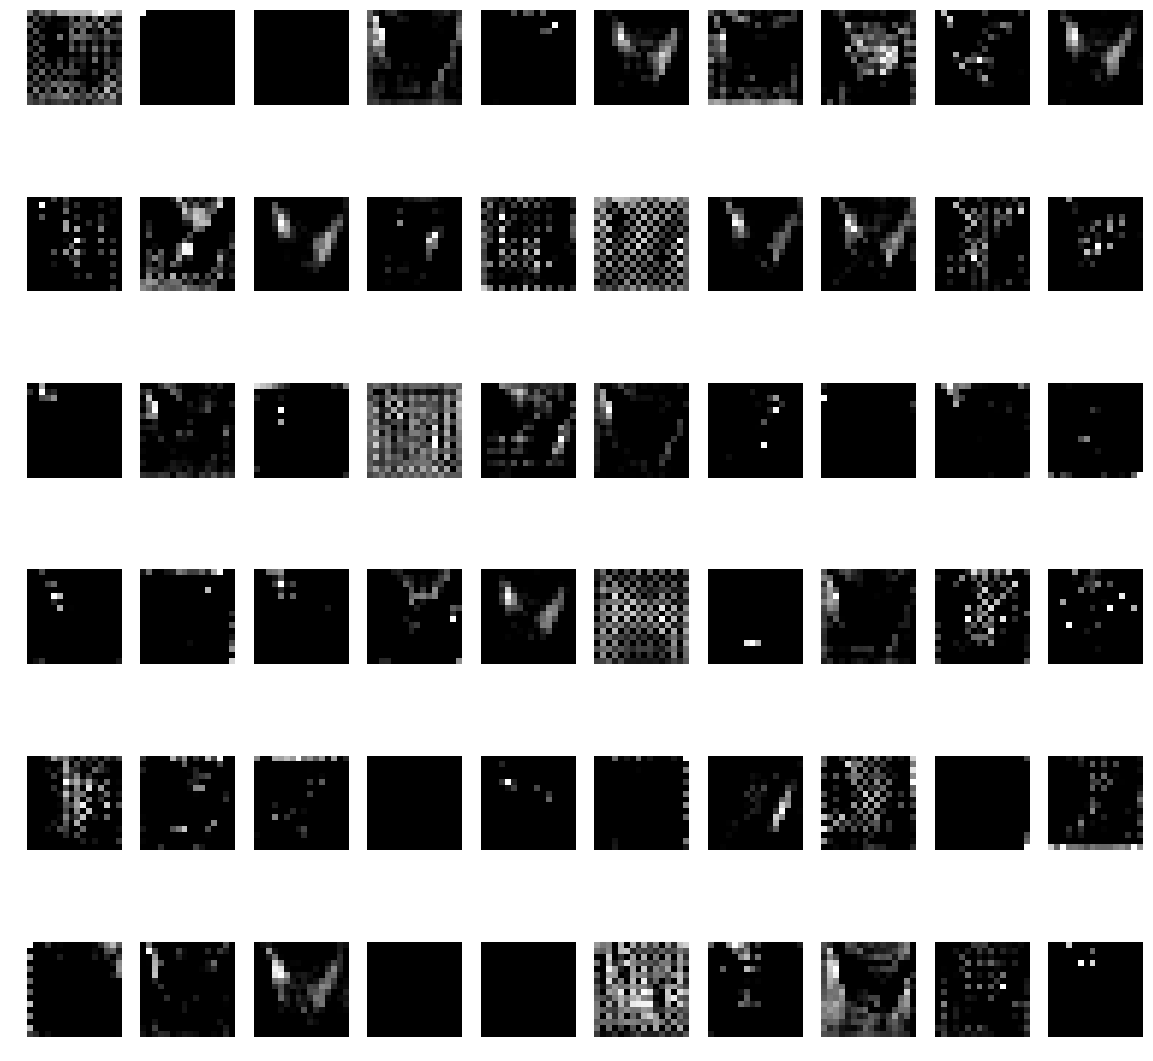

In [85]:
# 2層目までの特徴マップを、もうちょっと各チャンネルを可視化してみる
row = 6
col = 10
plt.figure(figsize=(20,20))

num = 0

for i in range(row):
    for j in range(col):
        num += 1
        plt.subplot(row, col, num)
        plt.imshow(im_one[2, i*10+j], cmap='gray')
        plt.axis('off')

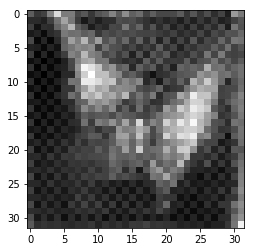

In [86]:
# 3層目までの処理結果に対して、チャンネル方向に平均を取って可視化
x  = fixed_noise

for i in range(4):
    x = model.layers[i](x)
im_one = x.data.cpu().numpy()

im_one.shape

im_a = im_one.mean(axis=1)
im_g = im_a[2]

plt.imshow(im_g, cmap='gray')

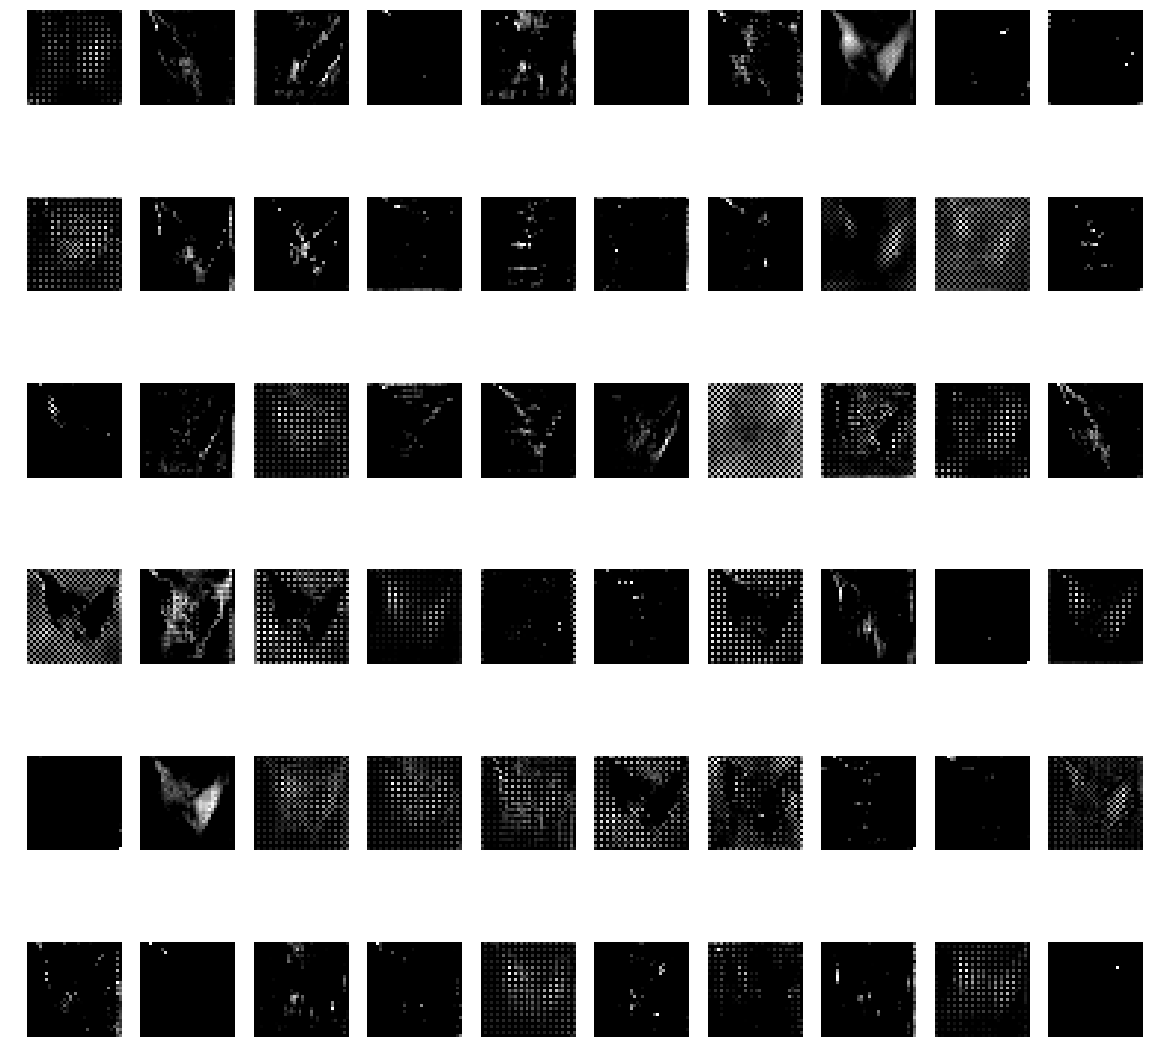

In [87]:
# もうちょっと特徴マップの各チャンネルを可視化してみる
row = 6
col = 10
plt.figure(figsize=(20,20))

num = 0

for i in range(row):
    for j in range(col):
        num += 1
        plt.subplot(row, col, num)
        plt.imshow(im_one[2, i*10+j], cmap='gray')
        plt.axis('off')

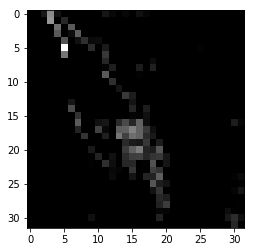

In [88]:
# 3層目を通した後の特徴マップ1つだけ確認してみた。
im_g = im_one[2,1, ...]

plt.imshow(im_g, cmap='gray')

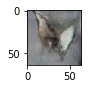

In [89]:
# 4層目の出力が、もとのカラー画像。
plt.figure(figsize=(1,1))
plt.imshow(im[2])

所感:  
とりあえず、転置畳み込みがどういうカーネルで、どういう処理結果をだしているかを調べてみた。  
ノイズに対してアップサンプリングしている理屈はわかったけど、何だか腑に落ちない。  
なぜSTL10ライクな画像を生成するのがこのカーネルのパターンなのかとか、なぜこの特徴マップのこのチャンネルはこういう絵なのだろうというのが、私にはいまいち納得できなかった。

結論:  
Im2Imなんもわからん